# Focal-H playground

In [162]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import sys
import json
from datetime import datetime
import focal
import importlib
importlib.reload(focal)

<module 'focal' from '/home/bjartur/workspace/notebooks/focal.py'>

In [2]:
CLUSTERED_DIR = "/home/bjartur/workspace/clustering_util/clustered/"
FOCALSIM_DIR = "/home/bjartur/workspace/clustering_util/data/focalsim/pi_plus_100e_deg0/"
CONVERTED_DIR = "/home/bjartur/workspace/focalh_data_transformer/data/converted/"
TRANS_DIR = "/home/bjartur/workspace/focalh_data_transformer/data/"

In [3]:
cent = ROOT.TFile(CONVERTED_DIR+"200_5_generic.root", "READ")
corn = ROOT.TFile(CONVERTED_DIR+"200_5_generic_corner.root", "READ")
x11 = ROOT.TFile(CONVERTED_DIR+"200_100_11x_11y_generic.root", "READ")
#x00x11 = ROOT.TFile(CONVERTED_DIR+"200_100_00x11x_00y11y_generic.root", "READ")
uni = ROOT.TFile(CONVERTED_DIR+"200_1000_uniform_generic.root", "READ")
mix2p = ROOT.TFile(CONVERTED_DIR+"200_1000_self_mix_2p.root", "READ")
mix3p = ROOT.TFile(CONVERTED_DIR+"200_1000_self_mix_3p.root", "READ")
mix10p = ROOT.TFile(CONVERTED_DIR+"200_1000_self_mix_10p.root", "READ")


In [4]:
cent_ttree = cent.Get("EventsTree")
corn_ttree = corn.Get("EventsTree")
x11_ttree = x11.Get("EventsTree")
#x00x11_ttree = x00x11.Get("EventsTree")
uni_ttree = uni.Get("EventsTree")
mix2p_ttree = mix2p.Get("EventsTree")
mix3p_ttree = mix3p.Get("EventsTree")
mix10p_ttree = mix10p.Get("EventsTree")

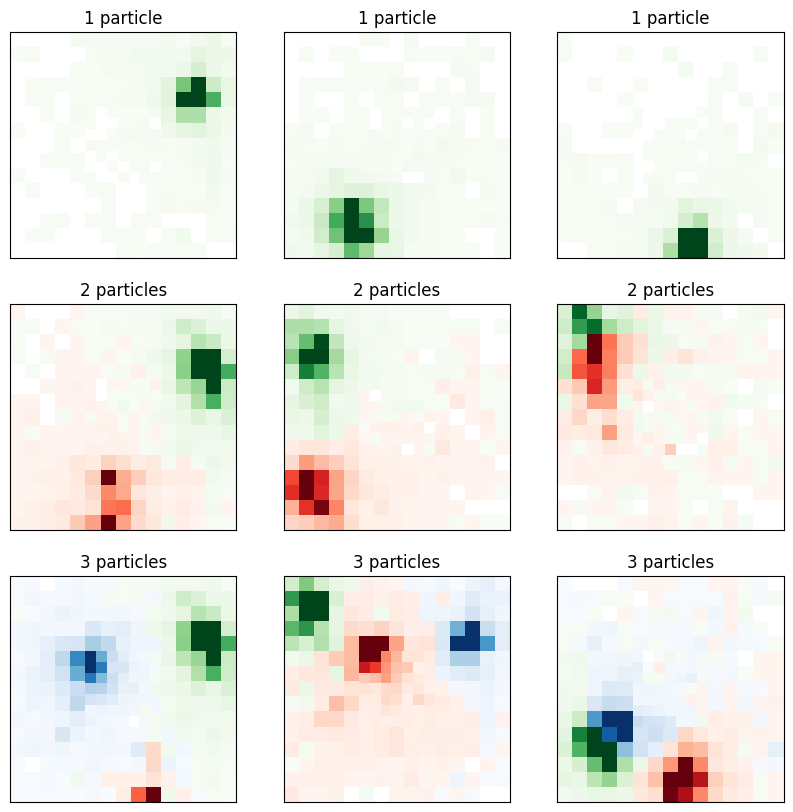

In [179]:
f = focal.FocalH()
entry = 0

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
ax = ax.flatten()
ax[0].set_title("1 particle")
ax[1].set_title("1 particle")
ax[2].set_title("1 particle")

ax[3].set_title("2 particles")
ax[4].set_title("2 particles")
ax[5].set_title("2 particles")

ax[6].set_title("3 particles")
ax[7].set_title("3 particles")
ax[8].set_title("3 particles")

for i in range(3):
    f.heatmap(uni_ttree, i+25, ax[i])
    
for i in range(3):
    f.heatmap(mix2p_ttree, i+(i*2000), ax[i+3])
    
for i in range(3):
    f.heatmap(mix3p_ttree, 10+i+(i*3000), ax[i+6])

for ax_i in ax:
    ax_i.get_xaxis().set_visible(False)
    ax_i.get_yaxis().set_visible(False)

fig.savefig("many.pdf", bbox_inches="tight", transparent=True)

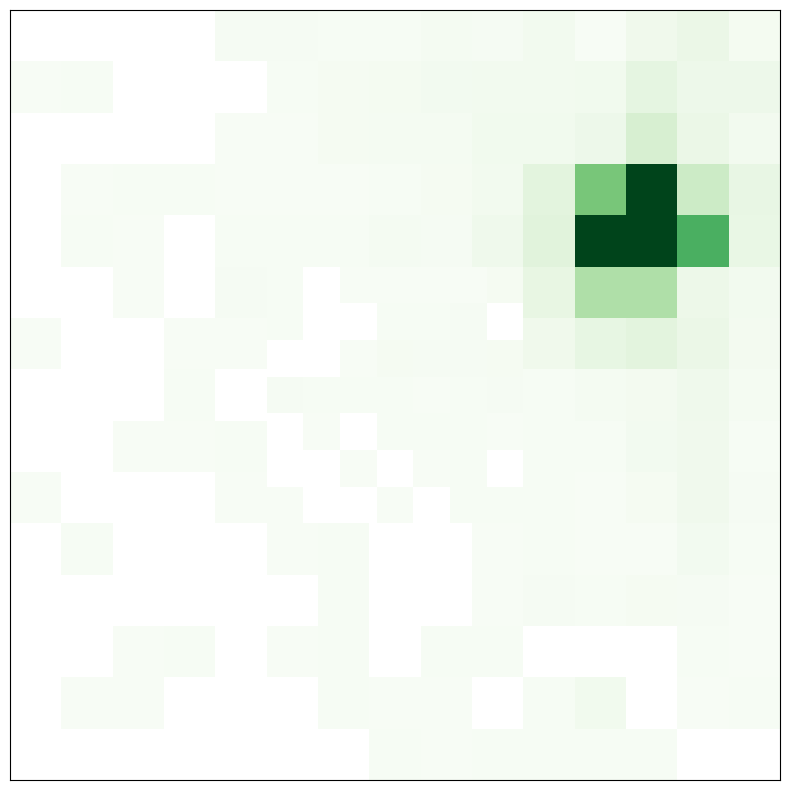

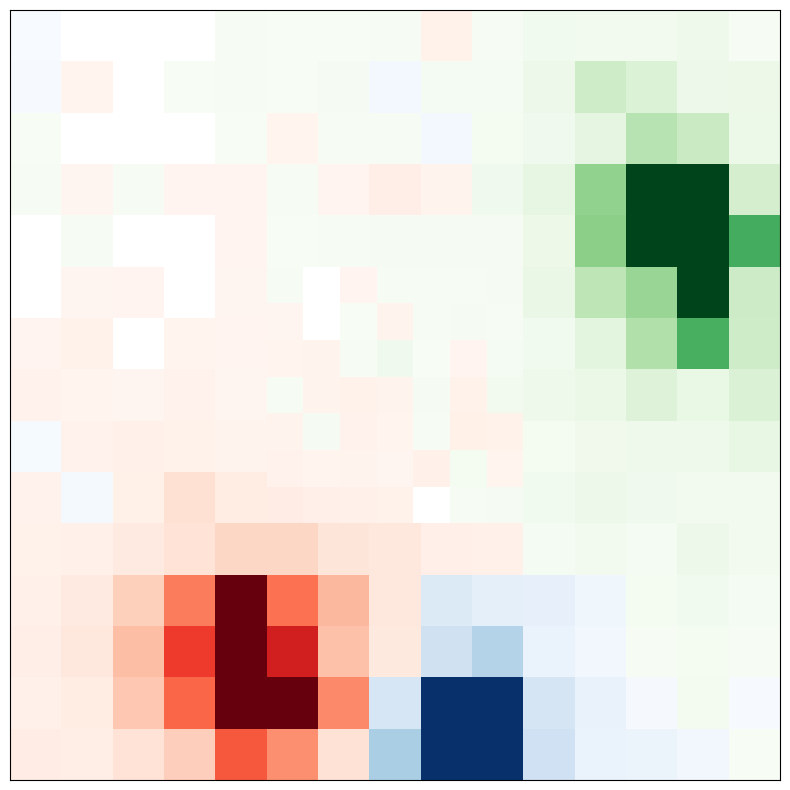

In [182]:
f = focal.FocalH()
entry = 0

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

idx=25
f.heatmap(uni_ttree, idx, ax)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
fig.savefig("poster_example_single.pdf", bbox_inches="tight", transparent=True)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

idx=25
f.heatmap(mix3p_ttree, idx, ax)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

fig.savefig("poster_example_many.pdf", bbox_inches="tight", transparent=True)



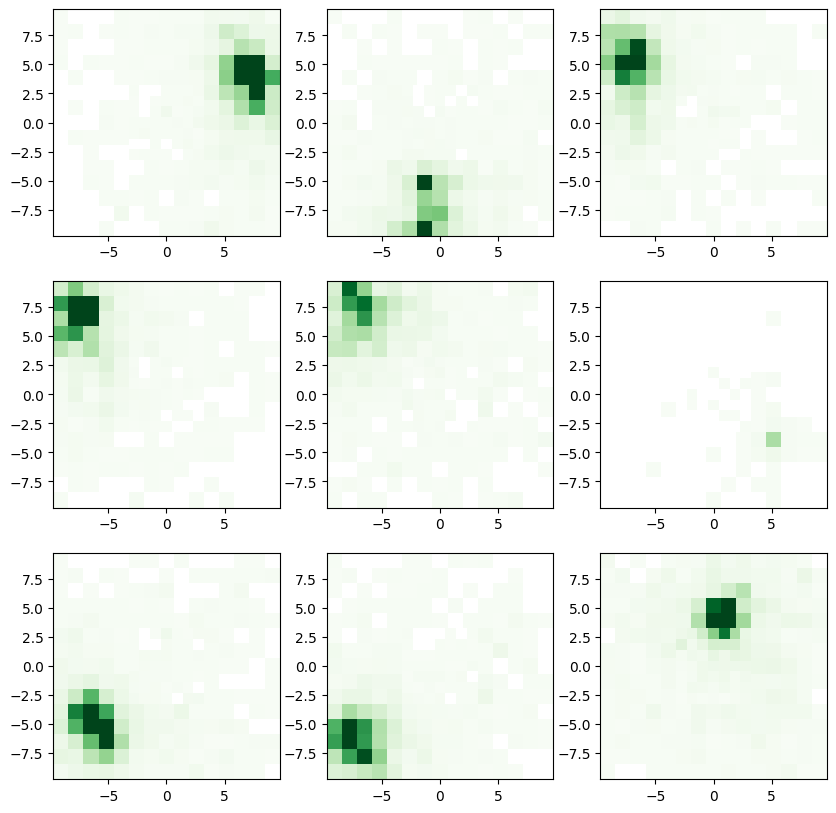

In [125]:
f = focal.FocalH()
entry = 0

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
ax = ax.flatten()

for i in range(9):
    f.heatmap(uni_ttree, i, ax[i])

fig.savefig("uni.png", bbox_inches="tight")

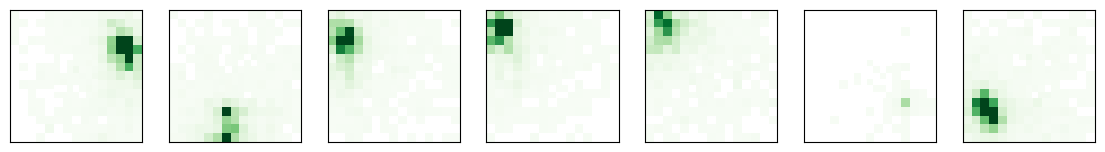

In [273]:
# f = focal.FocalH()
entry = 0

fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(14,2))
ax = ax.flatten()

for i in range(7):
    f.heatmap(uni_ttree, i, ax[i])
#    ax[i].set_title(f"{f.adc_sum(uni_ttree,i):.0f}")
    #ax[i].axis("off")
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)

fig.savefig("uni_line.pdf", bbox_inches="tight", transparent=True)

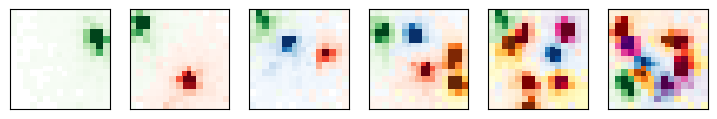

In [301]:
ids= [0, 3003, 4004, 2402, 4804, 6005]
uni = ROOT.TFile(CONVERTED_DIR+"200_1000_uniform_generic.root", "READ")
two = ROOT.TFile("/home/bjartur/workspace/clustering_util/clustered/"+"200_1000_self_mix_2p"+"_ma_800_100"+".root", "READ")
three = ROOT.TFile("/home/bjartur/workspace/clustering_util/clustered/"+"200_1000_self_mix_3p"+"_ma_800_100"+".root", "READ")
five = ROOT.TFile("/home/bjartur/workspace/clustering_util/clustered/"+"200_1000_self_mix_5p"+"_ma_800_100"+".root", "READ")
eight = ROOT.TFile("/home/bjartur/workspace/clustering_util/clustered/"+"200_1000_self_mix_8p"+"_ma_800_100"+".root", "READ")
ten = ROOT.TFile("/home/bjartur/workspace/clustering_util/clustered/"+"200_1000_self_mix_10p"+"_ma_800_100"+".root", "READ")

uni_ttree = uni.Get("EventsTree")
two_ttree = two.Get("EventsTree")
three_ttree = three.Get("EventsTree")
five_ttree = five.Get("EventsTree")
eight_ttree = eight.Get("EventsTree")
ten_ttree = ten.Get("EventsTree")

trees = [uni_ttree, two_ttree, three_ttree, five_ttree, eight_ttree, ten_ttree]

f = focal.FocalH()

fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(6*1.5,1*1.5))
ax = ax.flatten()


for i in range(len(trees)):
    f.heatmap(trees[i], ids[i], ax[i])
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)

fig.savefig("heatmap_ex.svg", bbox_inches="tight", transparent=True)

# Clustered

In [12]:
x00x11_cl = ROOT.TFile(CLUSTERED_DIR + "200_100_00x11_00y11y_ma_800_100.root", "READ")
x00x25_cl = ROOT.TFile(CLUSTERED_DIR + "200_100_00x25_00y25y_ma_800_100.root", "READ")
x00x37_cl = ROOT.TFile(CLUSTERED_DIR + "200_100_00x37_00y37y_ma_800_100.root", "READ")
x00x50_cl = ROOT.TFile(CLUSTERED_DIR + "200_100_00x50_00y50y_ma_800_100.root", "READ")
x00x62_cl = ROOT.TFile(CLUSTERED_DIR + "200_100_00x62_00y62y_ma_800_100.root", "READ")

mix3p_cl = ROOT.TFile(CLUSTERED_DIR + "200_1000_self_mix3p_ma_800_100.root", "READ")
mix2p_cl = ROOT.TFile(CLUSTERED_DIR + "200_1000_self_mix2p_ma_800_100.root", "READ")
p_cl = ROOT.TFile(CLUSTERED_DIR + "200_1000_uniform_generic_ma_800_100.root", "READ")


ttree_x00x11_cl = x00x11_cl.Get("EventsTree")
ttree_x00x25_cl = x00x25_cl.Get("EventsTree")
ttree_x00x37_cl = x00x37_cl.Get("EventsTree")
ttree_x00x50_cl = x00x50_cl.Get("EventsTree")
ttree_x00x62_cl = x00x62_cl.Get("EventsTree")

ttree_mix3p_cl = mix3p_cl.Get("EventsTree")
ttree_mix2p_cl = mix2p_cl.Get("EventsTree")
ttree_p_cl = p_cl.Get("EventsTree")

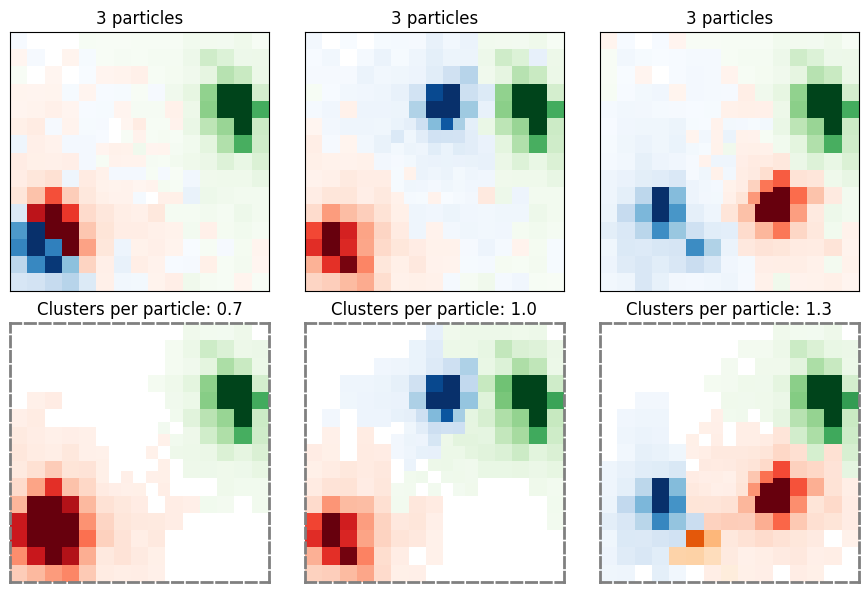

In [254]:
f = focal.FocalH()
entry = 0

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(9,6))
ax = ax.flatten()

offset = 80
events = [5,6,400]

colors_list = [['Reds', 'Greens', 'Blues', 'Oranges',
        'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
        'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
              ,
               ['Greens', 'Blues', 'Reds', 'Oranges',
        'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
        'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
               ,
               ['Reds', 'Greens', 'Blues', 'Oranges',
        'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
        'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
              ]


for i in range(3):
    f.heatmap(mix3p_ttree, events[i], ax[i])
    ax[i].set_title("3 particles")

for i in range(3):
    f.heatmap_clustered(ttree_mix3p_cl, events[i], ax[i+3], colors_list[i])
    ax[i+3].set_title("Clusters per particle: " + f"{f.clusters_per_label(ttree_mix3p_cl, events[i]):.1f}")

for ax_i in ax:
    ax_i.get_xaxis().set_visible(False)
    ax_i.get_yaxis().set_visible(False)

fig.tight_layout()
fig.savefig("many_cl.svg", bbox_inches="tight", transparent=True)

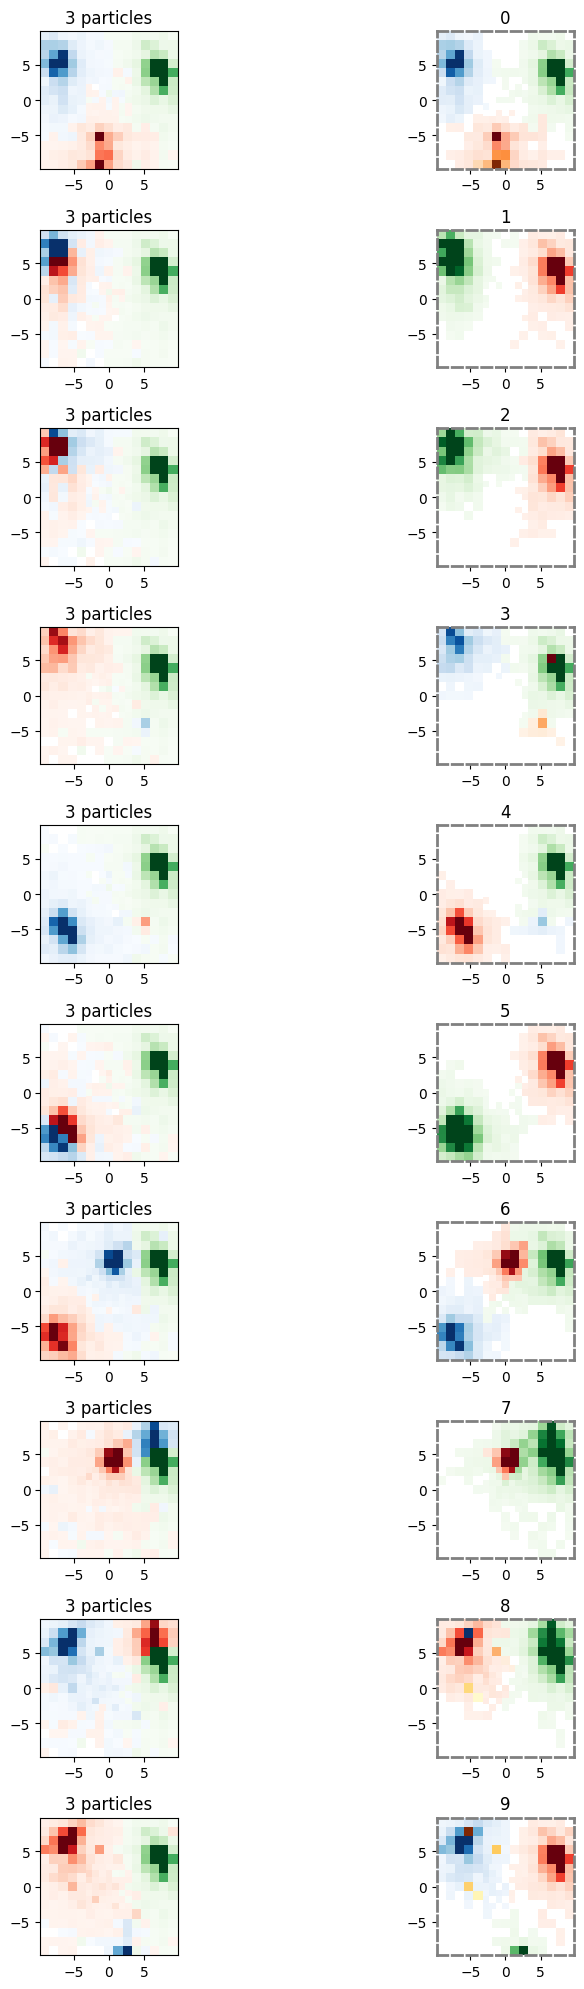

In [232]:
f = focal.FocalH()
entry = 0

fig, ax = plt.subplots(nrows=10, ncols=2, figsize=(10,20))
ax = ax.flatten()
offset=0
for i in range(0,10):
    f.heatmap(mix3p_ttree, i+offset, ax[2*i])
    ax[2*i].set_title("3 particles")
    f.heatmap_clustered(ttree_mix3p_cl, i+offset, ax[2*i+1])
    ax[2*i+1].set_title(str(i+offset))


fig.tight_layout()


[np.float64(53953.0), np.float64(23280.0), np.float64(46984.0), np.float64(11637.0)]


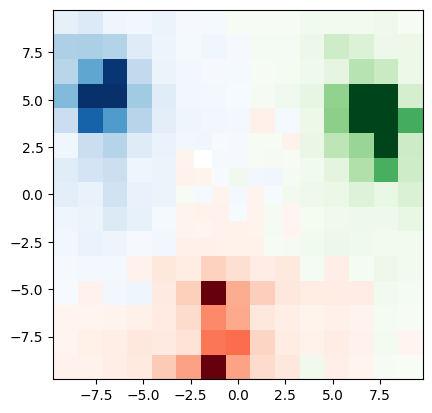

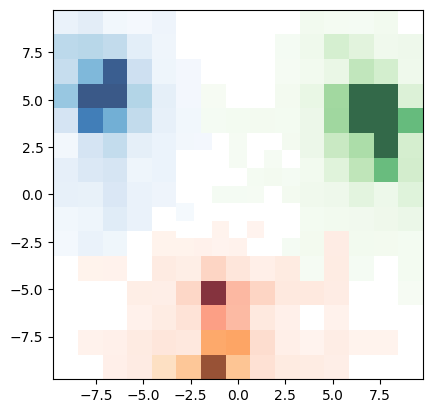

In [47]:
f = focal.FocalH()
entry = 0
print(f.cluster_sums(ttree_mix3p_cl, entry))
f.heatmap(ttree_mix3p_cl, entry)
f.heatmap_clustered(ttree_mix3p_cl, entry)

In [44]:
np.array([np.float64(53953.0), np.float64(23280.0), np.float64(46984.0), np.float64(11637.0)]).sum()

np.float64(135854.0)

In [40]:
arr = np.array([1,2,3])
for i in range(len(arr)):
    print(arr[i])

1
2
3


# Colors

Too many similar color gradients. Need to pick others or reduce set.

In [402]:
colors = (['Greens', 'Reds', 'Greys', 'Purples', 'Blues', 'Oranges',
        'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
        'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])

colors = (['Greens', 'Reds', 'Purples', 'Blues', 'Oranges',
        'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
        'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])

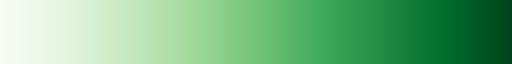

In [403]:
plt.colormaps[colors[0]]

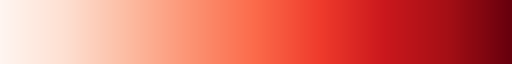

In [404]:
plt.colormaps[colors[1]]

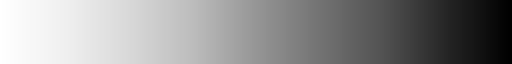

In [405]:
plt.colormaps[colors[2]] # remove?

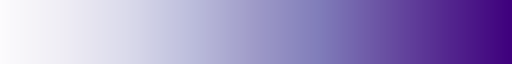

In [406]:
plt.colormaps[colors[3]]

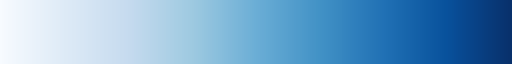

In [407]:
plt.colormaps[colors[4]]

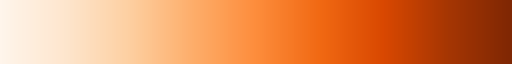

In [408]:
plt.colormaps[colors[5]]

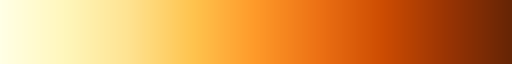

In [409]:
plt.colormaps[colors[6]]

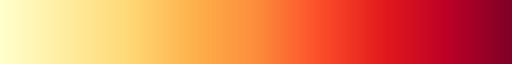

In [410]:
plt.colormaps[colors[7]]

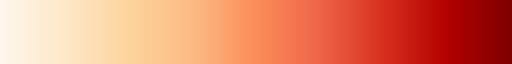

In [411]:
plt.colormaps[colors[8]]

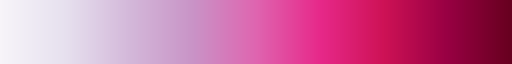

In [412]:
plt.colormaps[colors[9]]

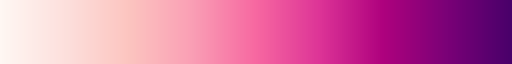

In [413]:
plt.colormaps[colors[10]]

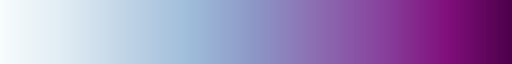

In [414]:
plt.colormaps[colors[11]]

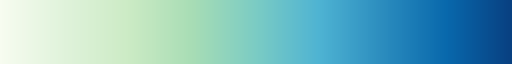

In [415]:
plt.colormaps[colors[12]]

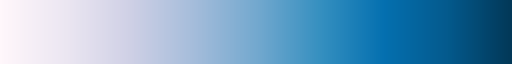

In [416]:
plt.colormaps[colors[13]]

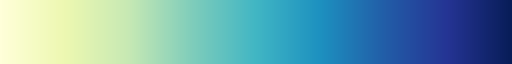

In [417]:
plt.colormaps[colors[14]]

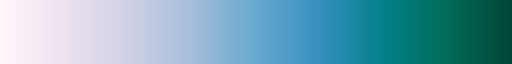

In [418]:
plt.colormaps[colors[15]]

# Analysis files

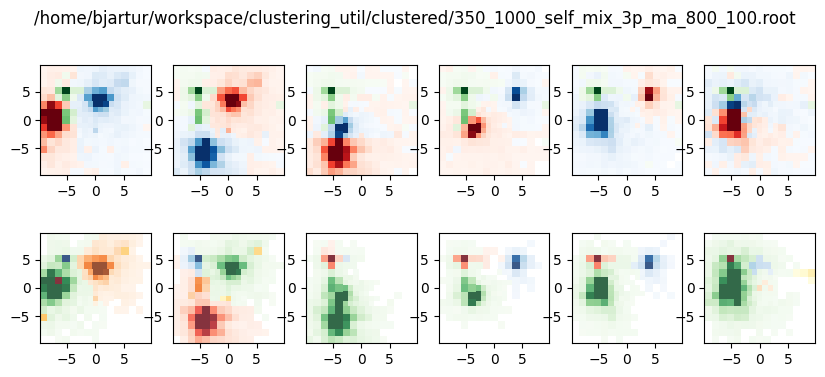

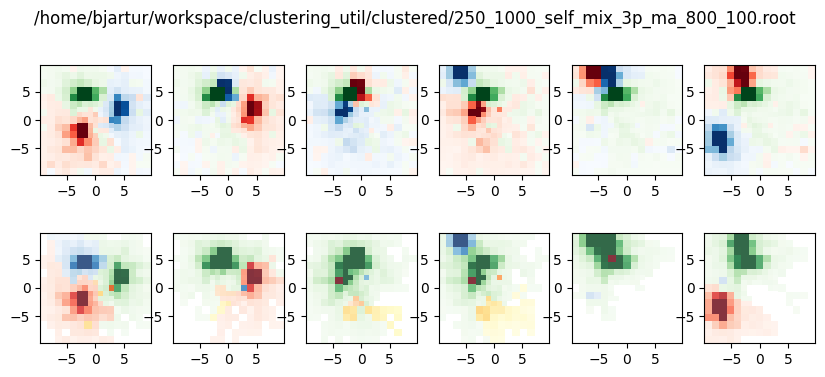

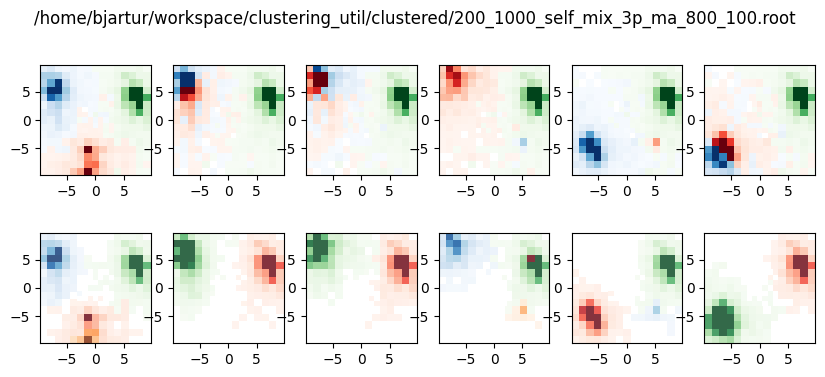

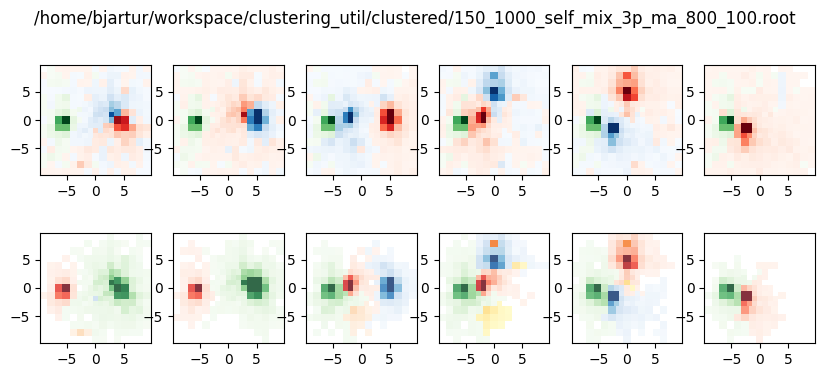

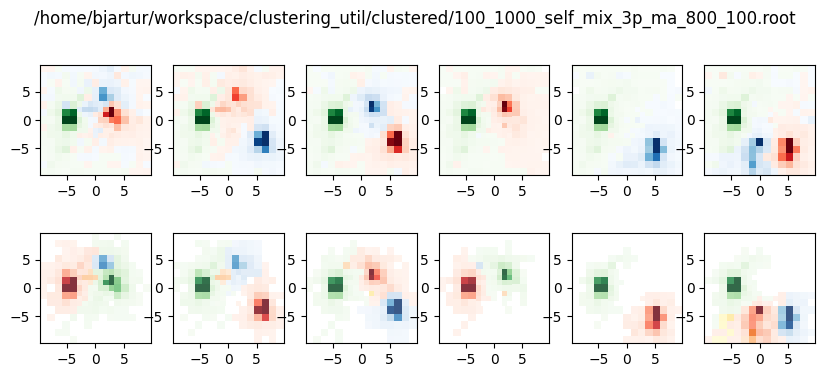

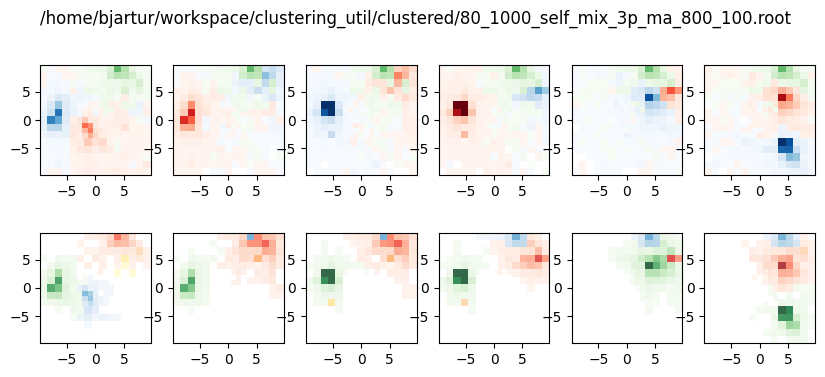

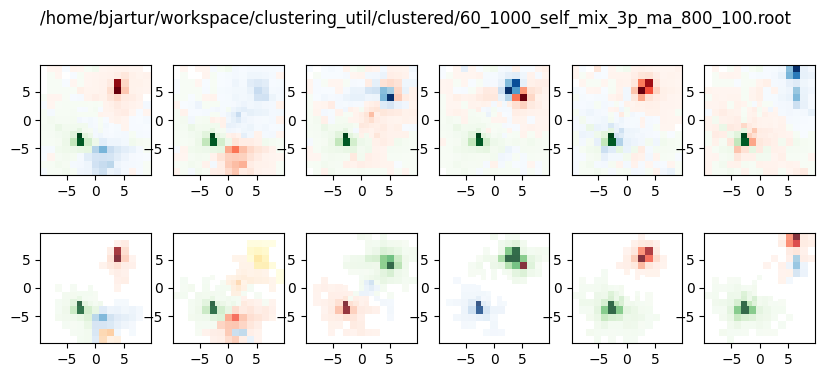

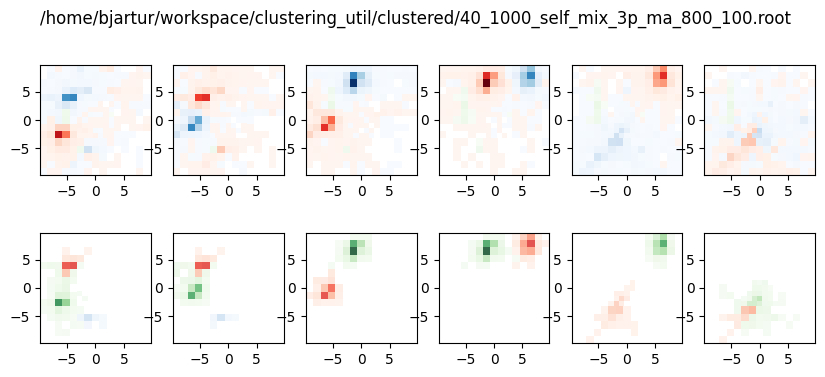

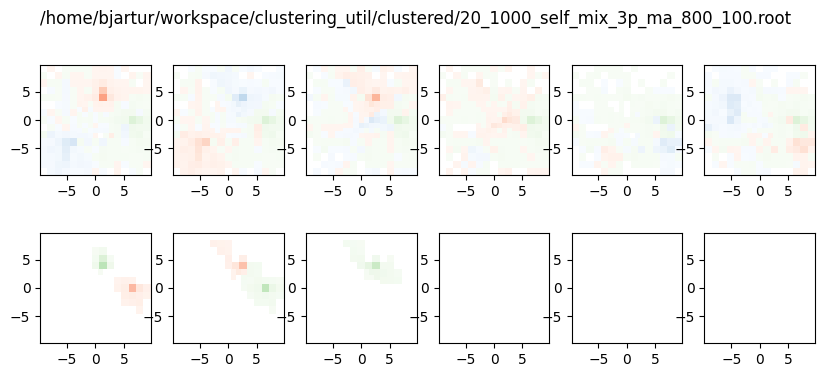

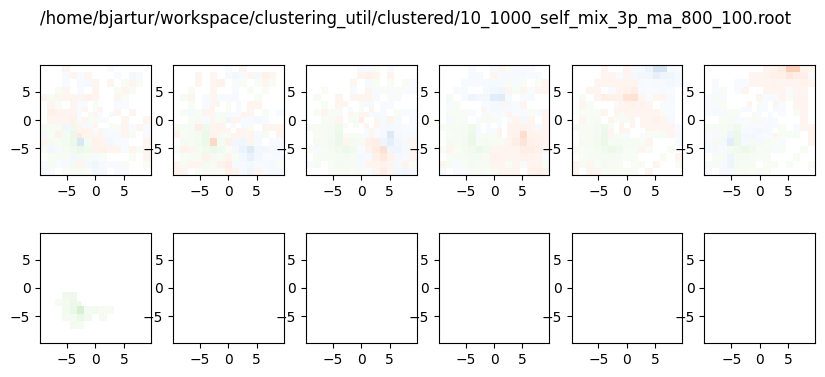

In [33]:
filenames = ["/home/bjartur/workspace/clustering_util/clustered/"+"350_1000_self_mix_3p"+"_ma_800_100"+".root"
             ,"/home/bjartur/workspace/clustering_util/clustered/"+"250_1000_self_mix_3p"+"_ma_800_100"+".root"
             ,"/home/bjartur/workspace/clustering_util/clustered/"+"200_1000_self_mix_3p"+"_ma_800_100"+".root"
             ,"/home/bjartur/workspace/clustering_util/clustered/"+"150_1000_self_mix_3p"+"_ma_800_100"+".root"
             ,"/home/bjartur/workspace/clustering_util/clustered/"+"100_1000_self_mix_3p"+"_ma_800_100"+".root"
             ,"/home/bjartur/workspace/clustering_util/clustered/"+"80_1000_self_mix_3p"+"_ma_800_100"+".root"
             ,"/home/bjartur/workspace/clustering_util/clustered/"+"60_1000_self_mix_3p"+"_ma_800_100"+".root"
             ,"/home/bjartur/workspace/clustering_util/clustered/"+"40_1000_self_mix_3p"+"_ma_800_100"+".root"
             ,"/home/bjartur/workspace/clustering_util/clustered/"+"20_1000_self_mix_3p"+"_ma_800_100"+".root"
             ,"/home/bjartur/workspace/clustering_util/clustered/"+"10_1000_self_mix_3p"+"_ma_800_100"+".root"
            ,]


def test_files(lst):
    for f in lst:
        tfile = ROOT.TFile(f, "READ")
        ttree = tfile.Get("EventsTree")
        foc = focal.FocalH()

        cols=6
        fig, ax = plt.subplots(nrows=2, ncols=cols, figsize=(10,4))
        ax = ax.flatten()

        for i in range(cols):
            foc.heatmap(ttree, i, ax[i])
        for i in range(cols):
            foc.heatmap_clustered(ttree, i, ax[i+cols])
        fig.suptitle(f)
        tfile.Close()

test_files(filenames)

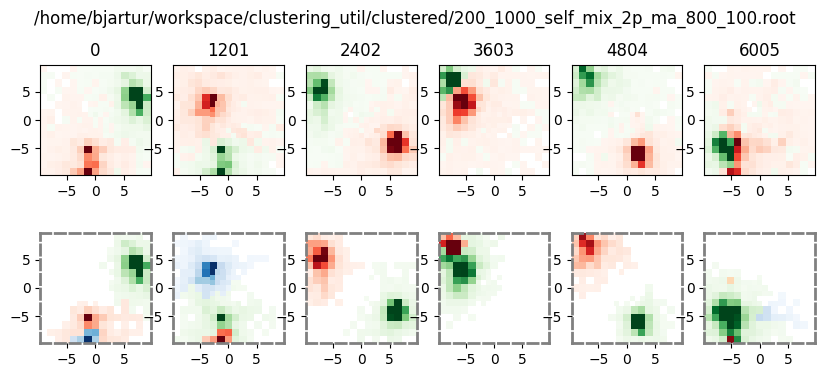

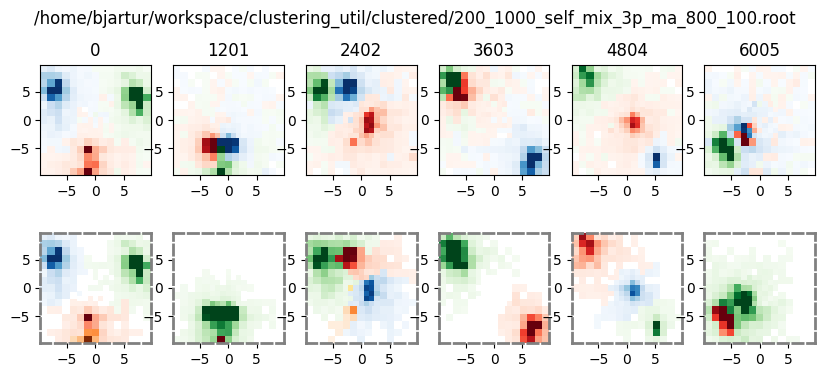

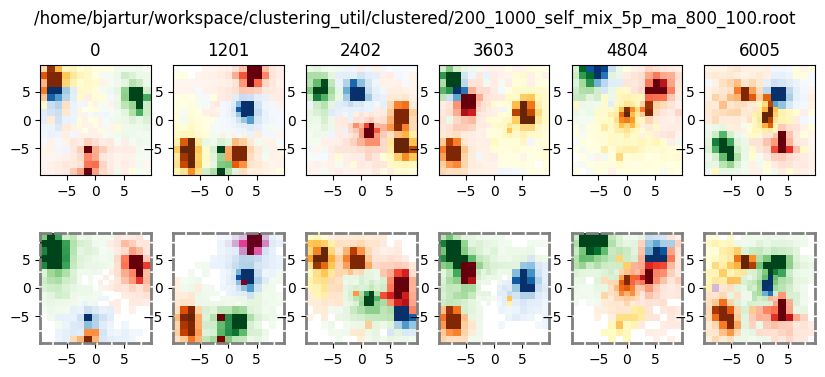

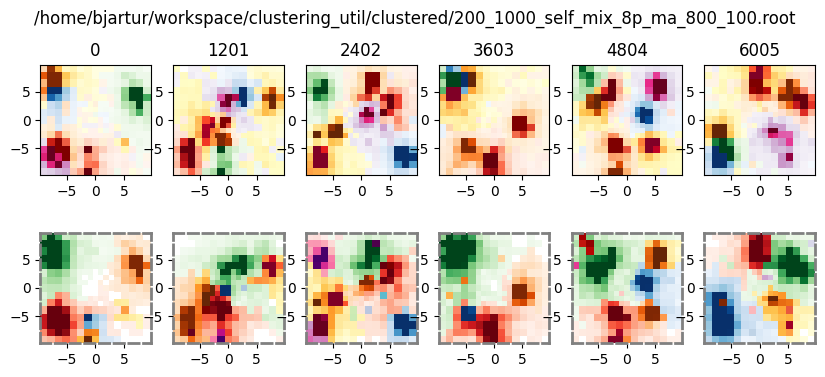

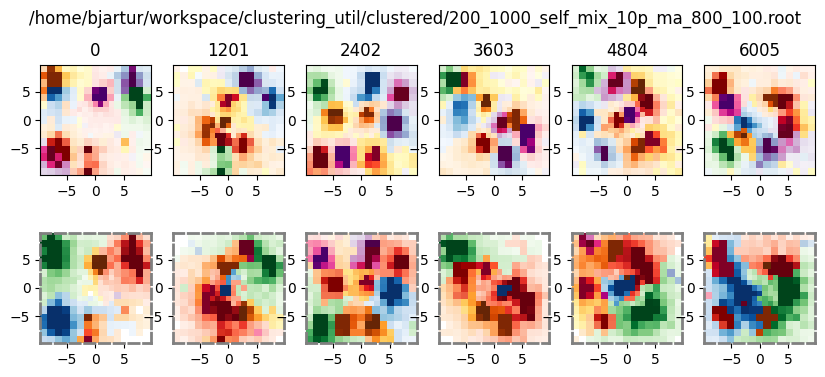

In [282]:
filenames = [#"/home/bjartur/workspace/clustering_util/clustered/"+"200_1000_uniform_generic_ma_800_100"+".root"
             "/home/bjartur/workspace/clustering_util/clustered/"+"200_1000_self_mix_2p"+"_ma_800_100"+".root"
             , "/home/bjartur/workspace/clustering_util/clustered/"+"200_1000_self_mix_3p"+"_ma_800_100"+".root"
             , "/home/bjartur/workspace/clustering_util/clustered/"+"200_1000_self_mix_5p"+"_ma_800_100"+".root"
             , "/home/bjartur/workspace/clustering_util/clustered/"+"200_1000_self_mix_8p"+"_ma_800_100"+".root"
             , "/home/bjartur/workspace/clustering_util/clustered/"+"200_1000_self_mix_10p"+"_ma_800_100"+".root"
#             ,"/home/bjartur/workspace/clustering_util/clustered/"+"250_1000_self_mix_3p"+"_ma_800_100"+".root"
#             ,"/home/bjartur/workspace/clustering_util/clustered/"+"200_1000_self_mix_3p"+"_ma_800_100"+".root"
#             ,"/home/bjartur/workspace/clustering_util/clustered/"+"150_1000_self_mix_3p"+"_ma_800_100"+".root"
#             ,"/home/bjartur/workspace/clustering_util/clustered/"+"100_1000_self_mix_3p"+"_ma_800_100"+".root"
#             ,"/home/bjartur/workspace/clustering_util/clustered/"+"80_1000_self_mix_3p"+"_ma_800_100"+".root"
#             ,"/home/bjartur/workspace/clustering_util/clustered/"+"60_1000_self_mix_3p"+"_ma_800_100"+".root"
#             ,"/home/bjartur/workspace/clustering_util/clustered/"+"40_1000_self_mix_3p"+"_ma_800_100"+".root"
#             ,"/home/bjartur/workspace/clustering_util/clustered/"+"20_1000_self_mix_3p"+"_ma_800_100"+".root"
#             ,"/home/bjartur/workspace/clustering_util/clustered/"+"10_1000_self_mix_3p"+"_ma_800_100"+".root"
            ,]


def test_files(lst):
    offset=1200
    for f in lst:
        tfile = ROOT.TFile(f, "READ")
        ttree = tfile.Get("EventsTree")
        foc = focal.FocalH()

        cols=6
        fig, ax = plt.subplots(nrows=2, ncols=cols, figsize=(10,4))
        ax = ax.flatten()

        for i in range(cols):
            foc.heatmap(ttree, i+(i*offset), ax[i])
            ax[i].set_title(str(i+(i*offset)))
        for i in range(cols):
            foc.heatmap_clustered(ttree, i+(i*offset), ax[i+cols])
        fig.suptitle(f)
        tfile.Close()

test_files(filenames)

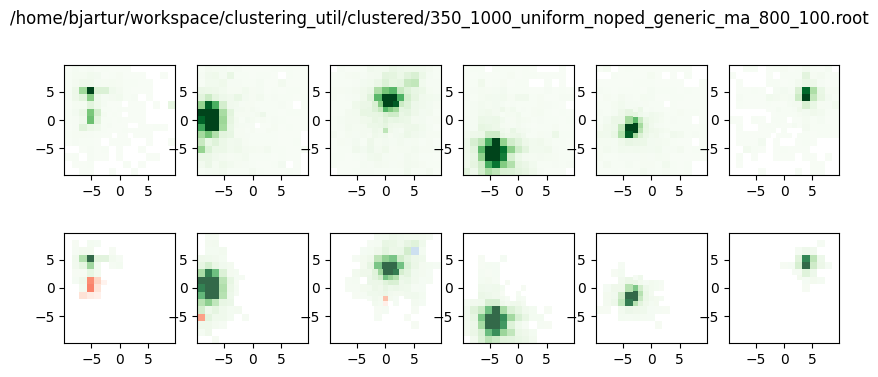

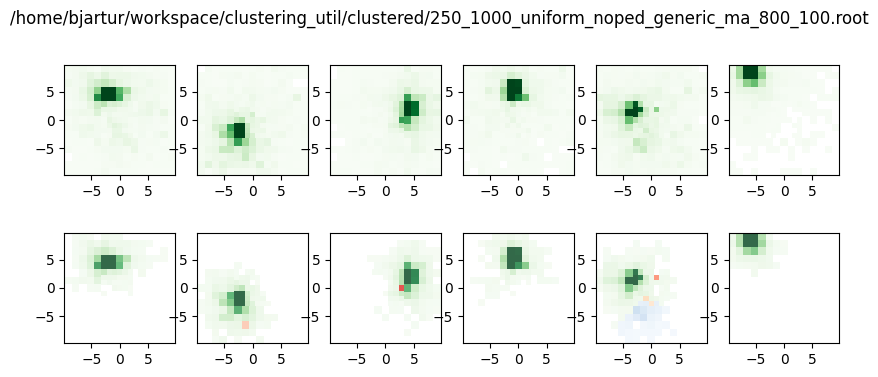

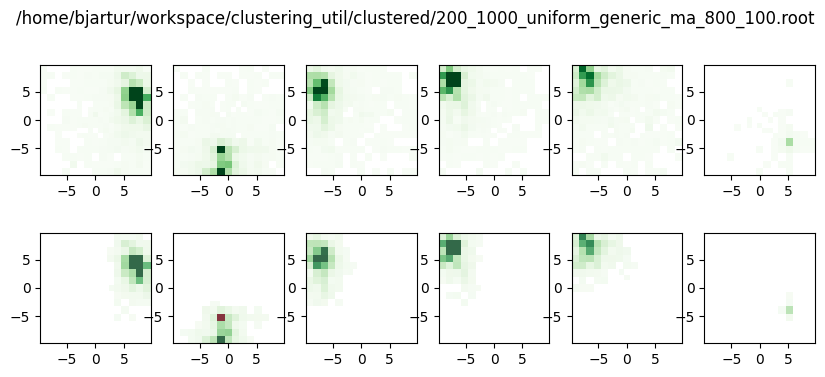

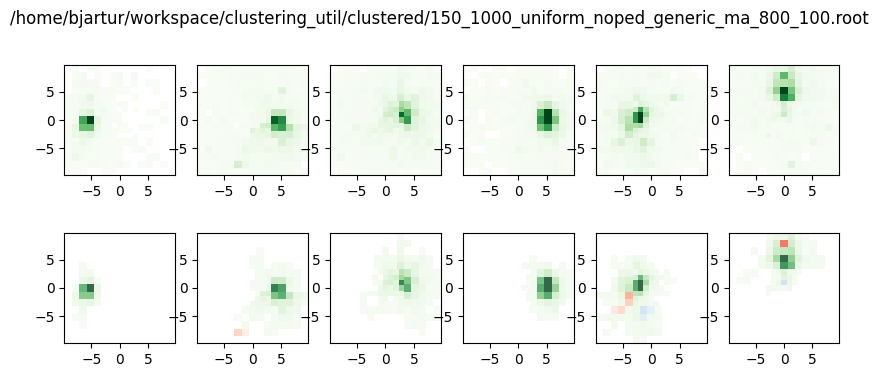

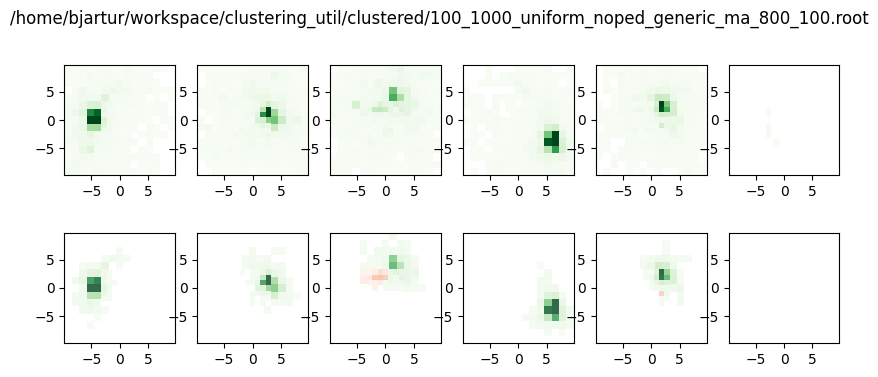

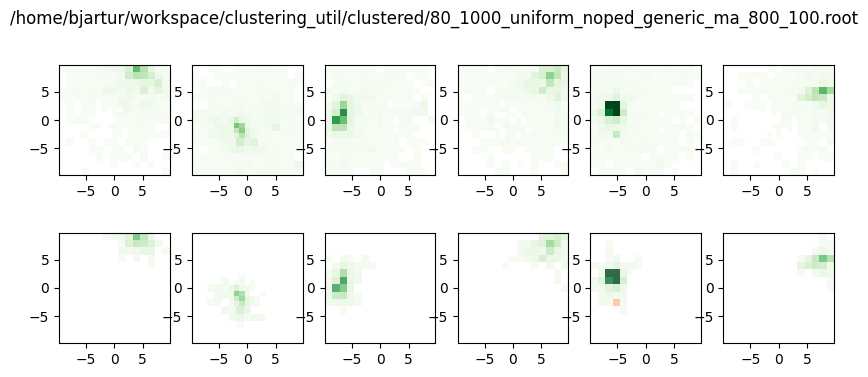

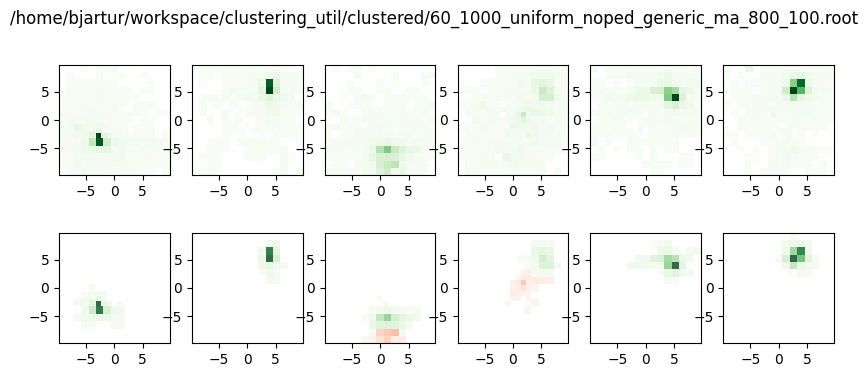

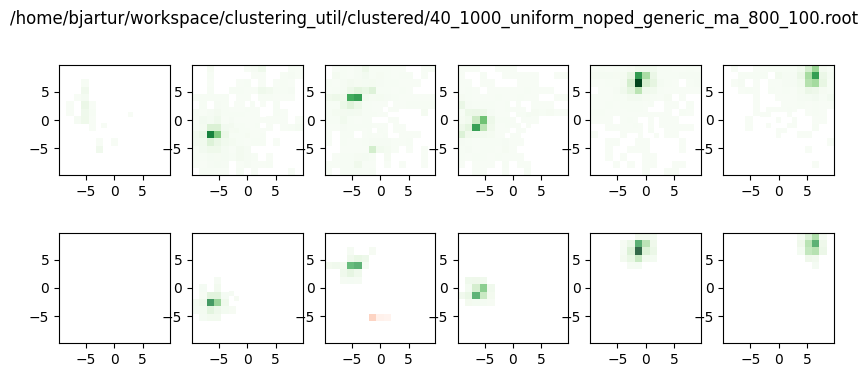

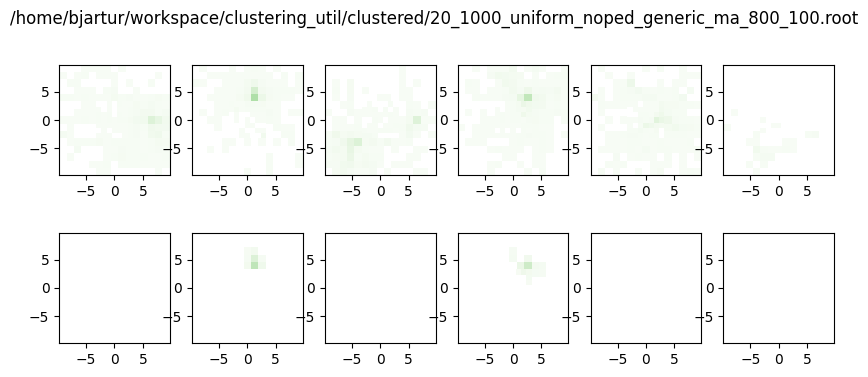

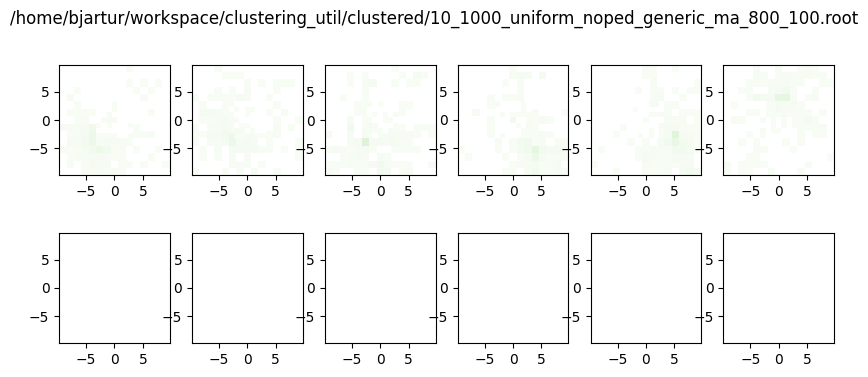

In [85]:
filenames = ["/home/bjartur/workspace/clustering_util/clustered/"+"350_1000_uniform_noped_generic"+"_ma_800_100"+".root"
             ,"/home/bjartur/workspace/clustering_util/clustered/"+"250_1000_uniform_noped_generic"+"_ma_800_100"+".root"
             ,"/home/bjartur/workspace/clustering_util/clustered/"+"200_1000_uniform_generic"+"_ma_800_100"+".root"
             ,"/home/bjartur/workspace/clustering_util/clustered/"+"150_1000_uniform_noped_generic"+"_ma_800_100"+".root"
             ,"/home/bjartur/workspace/clustering_util/clustered/"+"100_1000_uniform_noped_generic"+"_ma_800_100"+".root"
             ,"/home/bjartur/workspace/clustering_util/clustered/"+"80_1000_uniform_noped_generic"+"_ma_800_100"+".root"
             ,"/home/bjartur/workspace/clustering_util/clustered/"+"60_1000_uniform_noped_generic"+"_ma_800_100"+".root"
             ,"/home/bjartur/workspace/clustering_util/clustered/"+"40_1000_uniform_noped_generic"+"_ma_800_100"+".root"
             ,"/home/bjartur/workspace/clustering_util/clustered/"+"20_1000_uniform_noped_generic"+"_ma_800_100"+".root"
             ,"/home/bjartur/workspace/clustering_util/clustered/"+"10_1000_uniform_noped_generic"+"_ma_800_100"+".root"
            ,]


def test_files(lst):
    for f in lst:
        tfile = ROOT.TFile(f, "READ")
        ttree = tfile.Get("EventsTree")
        foc = focal.FocalH()

        cols=6
        fig, ax = plt.subplots(nrows=2, ncols=cols, figsize=(10,4))
        ax = ax.flatten()

        for i in range(cols):
            foc.heatmap(ttree, i, ax[i])
        for i in range(cols):
            foc.heatmap_clustered(ttree, i, ax[i+cols])
        fig.suptitle(f)
        tfile.Close()

test_files(filenames)

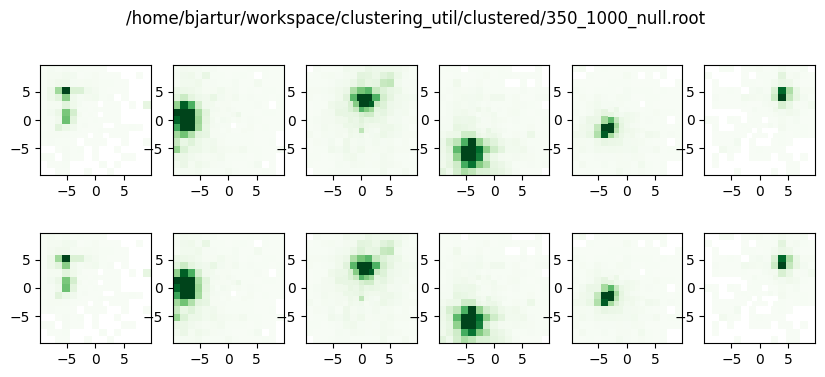

In [93]:
importlib.reload(focal)
filenames = ["/home/bjartur/workspace/clustering_util/clustered/"+"350_1000_"+"null"+".root"
#             ,"/home/bjartur/workspace/clustering_util/clustered/"+"250_1000_uniform_noped_generic"+"_ma_800_100"+".root"
#             ,"/home/bjartur/workspace/clustering_util/clustered/"+"200_1000_uniform_generic"+"_ma_800_100"+".root"
#             ,"/home/bjartur/workspace/clustering_util/clustered/"+"150_1000_uniform_noped_generic"+"_ma_800_100"+".root"
#             ,"/home/bjartur/workspace/clustering_util/clustered/"+"100_1000_uniform_noped_generic"+"_ma_800_100"+".root"
#             ,"/home/bjartur/workspace/clustering_util/clustered/"+"80_1000_uniform_noped_generic"+"_ma_800_100"+".root"
#             ,"/home/bjartur/workspace/clustering_util/clustered/"+"60_1000_uniform_noped_generic"+"_ma_800_100"+".root"
#             ,"/home/bjartur/workspace/clustering_util/clustered/"+"40_1000_uniform_noped_generic"+"_ma_800_100"+".root"
#             ,"/home/bjartur/workspace/clustering_util/clustered/"+"20_1000_uniform_noped_generic"+"_ma_800_100"+".root"
#             ,"/home/bjartur/workspace/clustering_util/clustered/"+"10_1000_uniform_noped_generic"+"_ma_800_100"+".root"
            ,]


def test_files(lst):
    for f in lst:
        tfile = ROOT.TFile(f, "READ")
        ttree = tfile.Get("EventsTree")
        foc = focal.FocalH()

        cols=6
        fig, ax = plt.subplots(nrows=2, ncols=cols, figsize=(10,4))
        ax = ax.flatten()

        for i in range(cols):
            foc.heatmap(ttree, i, ax[i])
        for i in range(cols):
            foc.heatmap_clustered(ttree, i, ax[i+cols])
        fig.suptitle(f)
        tfile.Close()

test_files(filenames)

In [105]:
tfile_null = ROOT.TFile("/home/bjartur/workspace/clustering_util/clustered/"+"350_1000_self_mix_2p_"+"null"+".root", "READ")
tfile_ma = ROOT.TFile("/home/bjartur/workspace/clustering_util/clustered/"+"350_1000_self_mix_2p_"+"ma_800_100"+".root", "READ")
ttree_null = tfile_null.Get("EventsTree")
ttree_ma = tfile_ma.Get("EventsTree")

0.5
0.0
0.0
1.0


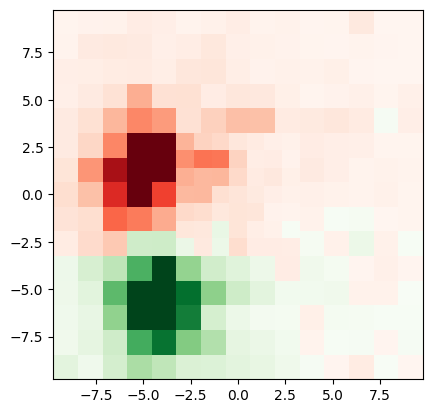

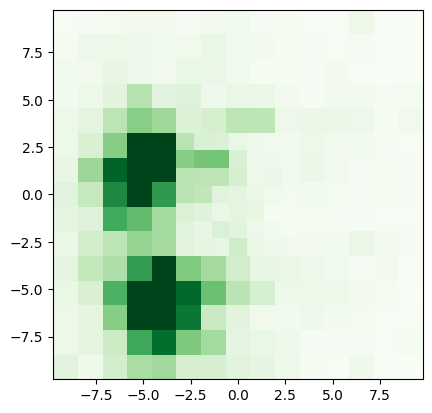

2.5
0.45720479186421686
0.5909239791634745
0.37283629709755367


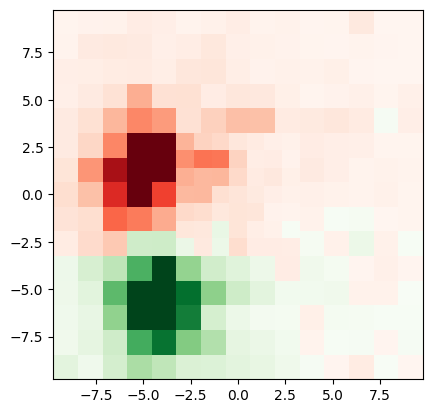

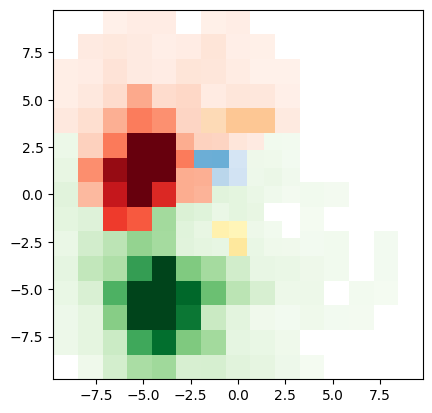

In [111]:
foc = focal.FocalH()
entry = 3000
ttree_null.GetEntry(entry)
print(foc.clusters_per_label(ttree_null, entry))
print(foc.v_score(ttree_null, entry, True))
print(foc.homogeneity_score(ttree_null, entry, True))
print(foc.completeness_score(ttree_null, entry, True))
foc.heatmap(ttree_null, entry)
foc.heatmap_clustered(ttree_null, entry)

plt.show()
ttree_ma.GetEntry(entry)
print(foc.clusters_per_label(ttree_ma, entry))
print(foc.v_score(ttree_ma, entry, True))
print(foc.homogeneity_score(ttree_ma, entry, True))
print(foc.completeness_score(ttree_ma, entry, True))
foc.heatmap(ttree_ma, entry)
foc.heatmap_clustered(ttree_ma, entry)



# Analysis

Make some analysis that takes in a list of clustered files and computes all the relevant measures.

In [117]:
def analyse_files(files, save=False, save_name="NA", Nmax_events = -1):
    Nfiles = len(files)
    print("Number of files:", Nfiles)
    Lentris = np.zeros(Nfiles, dtype=int)
    Lfiles = [None]*Nfiles
    Ltrees = [None]*Nfiles
    
    for i in range(Nfiles):
        Lfiles[i] = ROOT.TFile(files[i], "READ")
        Ltrees[i] = Lfiles[i].Get("EventsTree")
        if Nmax_events == -1:
            Lentris[i] = Ltrees[i].GetEntries()
        else:
            Lentris[i] = np.min([Ltrees[i].GetEntries(), Nmax_events])

    Nevents = Lentris.sum()

    DF = pd.DataFrame()

    # Lists
    Lcom = [None] * Nevents
    Lenergies = [None] * Nevents
    Llabel_sums = [None] * Nevents
    Lcluster_sums = [None] * Nevents

    # Arrays
    Lclusters_per_label = np.zeros(Nevents)
    Lv_score = np.zeros(Nevents)
    Lhomogeneity_score = np.zeros(Nevents)
    Lcompleteness_score = np.zeros(Nevents)
    Lcom_avg = np.ones(Nevents)*-1
    Ladc_sum = np.zeros(Nevents)

    # New
    Lnum_labels = np.zeros(Nevents)
    Lnum_saturated_cells = np.zeros(Nevents)
    
    print("Number of events", Nevents)

    foc = focal.FocalH()
    
    cnt = 0
    for it in range(Nfiles):
        max_its = Nmax_events
        if Nmax_events == -1:
            max_its = Lentris[it]
        for ie in range(Lentris[it]):
            if ie%1 == 0:
                Lcom[cnt] = foc.labels_center_of_mass(Ltrees[it], ie)
                Lclusters_per_label[cnt] = foc.clusters_per_label(Ltrees[it], ie)
                Lv_score[cnt] = foc.v_score(Ltrees[it], ie, repeat=True)
                Lhomogeneity_score[cnt] = foc.homogeneity_score(Ltrees[it], ie, repeat=True)
                Lcompleteness_score[cnt] = foc.completeness_score(Ltrees[it], ie, repeat=True)
                Lcom_avg[cnt] = foc.avg_com(Lcom[cnt])
                Ladc_sum[cnt] = foc.adc_sum(Ltrees[it], ie)
                Lnum_labels[cnt] = foc.num_labels(Ltrees[it], ie)
                Lnum_saturated_cells[cnt] = foc.num_saturated_cells(Ltrees[it], ie, 4095)
                Lenergies[cnt] = foc.get_energies(Ltrees[it], ie)
                Lcluster_sums[cnt] = foc.cluster_sums(Ltrees[it], ie)
#                foc.heatmap(Ltrees[it], ie)
#                foc.heatmap_clustered(Ltrees[it], ie)
#                plt.show()
#                print(files[it], Lcom[cnt], Lclusters_per_label[cnt], Lv_score[cnt], Lhomogeneity_score[cnt], Lcompleteness_score[cnt])
            cnt += 1
        print(files[it], "computed.")
    print("Done.")

    # Cleanup
    for f in Lfiles:
        f.Close()

    DF["Lcom"] = Lcom
    DF["Lclusters_per_label"] = Lclusters_per_label
    DF["Lv_score"] = Lv_score
    DF["Lhomogeneity_score"] = Lhomogeneity_score
    DF["Lcompleteness_score"] = Lcompleteness_score
    DF["Lcom_avg"] = Lcom_avg
    DF["Ladc_sum"] = Ladc_sum
    DF["Lnum_labels"] = Lnum_labels
    DF["Lnum_saturated_cells"] = Lnum_saturated_cells
    DF["Lenergies"] = Lenergies
    DF["Lcluster_sums"] = Lcluster_sums

    if save:
        DF.to_pickle("df_"+save_name+"_"+datetime.now().strftime("%Y%m%d_%H%M%S"))

    return DF

In [271]:
ma_filenames = [
            CLUSTERED_DIR + "350_1000_uniform_noped_generic" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "300_1000_uniform_noped_generic" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "250_1000_uniform_noped_generic" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "200_1000_uniform_generic" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "150_1000_uniform_noped_generic" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "100_1000_uniform_noped_generic" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "80_1000_uniform_noped_generic" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "60_1000_uniform_noped_generic" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "40_1000_uniform_noped_generic" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "20_1000_uniform_noped_generic" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "10_1000_uniform_noped_generic" + "_ma_800_100"+".root"

            , CLUSTERED_DIR + "350_1000_self_mix_2p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "300_1000_self_mix_2p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "250_1000_self_mix_2p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "200_1000_self_mix_2p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "150_1000_self_mix_2p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "100_1000_self_mix_2p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "80_1000_self_mix_2p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "60_1000_self_mix_2p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "40_1000_self_mix_2p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "20_1000_self_mix_2p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "10_1000_self_mix_2p" + "_ma_800_100"+".root"
    
            , CLUSTERED_DIR + "350_1000_self_mix_3p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "300_1000_self_mix_3p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "250_1000_self_mix_3p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "200_1000_self_mix_3p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "150_1000_self_mix_3p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "100_1000_self_mix_3p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "80_1000_self_mix_3p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "60_1000_self_mix_3p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "40_1000_self_mix_3p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "20_1000_self_mix_3p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "10_1000_self_mix_3p" + "_ma_800_100"+".root"

            , CLUSTERED_DIR + "350_1000_self_mix_5p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "300_1000_self_mix_5p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "250_1000_self_mix_5p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "200_1000_self_mix_5p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "150_1000_self_mix_5p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "100_1000_self_mix_5p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "80_1000_self_mix_5p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "60_1000_self_mix_5p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "40_1000_self_mix_5p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "20_1000_self_mix_5p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "10_1000_self_mix_5p" + "_ma_800_100"+".root"

            , CLUSTERED_DIR + "350_1000_self_mix_8p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "300_1000_self_mix_8p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "250_1000_self_mix_8p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "200_1000_self_mix_8p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "150_1000_self_mix_8p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "100_1000_self_mix_8p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "80_1000_self_mix_8p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "60_1000_self_mix_8p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "40_1000_self_mix_8p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "20_1000_self_mix_8p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "10_1000_self_mix_8p" + "_ma_800_100"+".root"


            , CLUSTERED_DIR + "350_1000_self_mix_10p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "300_1000_self_mix_10p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "250_1000_self_mix_10p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "200_1000_self_mix_10p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "150_1000_self_mix_10p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "100_1000_self_mix_10p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "80_1000_self_mix_10p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "60_1000_self_mix_10p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "40_1000_self_mix_10p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "20_1000_self_mix_10p" + "_ma_800_100"+".root"
            , CLUSTERED_DIR + "10_1000_self_mix_10p" + "_ma_800_100"+".root"



    
            ,]
df_ma = analyse_files(ma_filenames, True, "ma_800_100", 100)

Number of files: 66
Number of events 6600
/home/bjartur/workspace/clustering_util/clustered/350_1000_uniform_noped_generic_ma_800_100.root computed.
/home/bjartur/workspace/clustering_util/clustered/300_1000_uniform_noped_generic_ma_800_100.root computed.
/home/bjartur/workspace/clustering_util/clustered/250_1000_uniform_noped_generic_ma_800_100.root computed.
/home/bjartur/workspace/clustering_util/clustered/200_1000_uniform_generic_ma_800_100.root computed.
/home/bjartur/workspace/clustering_util/clustered/150_1000_uniform_noped_generic_ma_800_100.root computed.
/home/bjartur/workspace/clustering_util/clustered/100_1000_uniform_noped_generic_ma_800_100.root computed.
/home/bjartur/workspace/clustering_util/clustered/80_1000_uniform_noped_generic_ma_800_100.root computed.
/home/bjartur/workspace/clustering_util/clustered/60_1000_uniform_noped_generic_ma_800_100.root computed.
/home/bjartur/workspace/clustering_util/clustered/40_1000_uniform_noped_generic_ma_800_100.root computed.
/hom

In [270]:
single = df_ma.Lnum_labels <= 1
ten = df_ma.Lnum_labels == 10
df_ma[single].Lclusters_per_label.mean()
df_ma.Lv_score.mean()

np.float64(0.3832091720092046)

In [257]:
df_ma

,Lcom,Lclusters_per_label,Lv_score,Lhomogeneity_score,Lcompleteness_score,Lcom_avg,Ladc_sum,Lnum_labels,Lnum_saturated_cells,Lenergies,Lcluster_sums
0,"[[-4.509516340751861, 3.0383975001125454]]",2.000000,0.000000,1.000000,0.000000,-1.000000,23494.0,1.0,1.0,[350.0],"[13597.0, 6661.0]"
1,"[[-6.3023217813856025, 0.02722564515785644]]",2.000000,0.000000,1.000000,0.000000,-1.000000,77766.0,1.0,7.0,[350.0],"[67395.0, 1657.0]"
2,"[[0.8183251463982363, 2.4213109898164835]]",3.000000,0.000000,1.000000,0.000000,-1.000000,86063.0,1.0,4.0,[350.0],"[74306.0, 1376.0, 1103.0]"
3,"[[-3.3581115339969596, -4.672998570954047]]",1.000000,0.000000,1.000000,0.000000,-1.000000,81320.0,1.0,5.0,[350.0],[72929.0]
4,"[[-2.6121692604904014, -1.3380434027806964]]",1.000000,0.000000,1.000000,0.000000,-1.000000,45723.0,1.0,3.0,[350.0],[39198.0]
...,...,...,...,...,...,...,...,...,...,...,...
325,"[[-3.190941809090787, -3.6875041422346357], [-...",0.000000,0.000000,0.000000,1.000000,9.499228,9827.0,3.0,0.0,"[10.0, 10.0, 10.0, 10.0]",[]
326,"[[-3.190941809090787, -3.6875041422346357], [0...",0.000000,0.000000,0.000000,1.000000,2.951830,9266.0,3.0,0.0,"[10.0, 10.0, 10.0, 10.0]",[]
327,"[[-3.190941809090787, -3.6875041422346357], [2...",0.000000,0.000000,0.000000,1.000000,8.359952,8810.0,3.0,0.0,"[10.0, 10.0, 10.0, 10.0]",[]
328,"[[-3.190941809090787, -3.6875041422346357], [-...",0.000000,0.000000,0.000000,1.000000,8.468985,9609.0,3.0,0.0,"[10.0, 10.0, 10.0, 10.0]",[]


In [272]:
null_filenames = [
            CLUSTERED_DIR + "350_1000_uniform_noped" + "_null"+".root"
            , CLUSTERED_DIR + "300_1000_uniform_noped" + "_null"+".root"
            , CLUSTERED_DIR + "250_1000_uniform_noped" + "_null"+".root"
            , CLUSTERED_DIR + "200_1000_uniform" + "_null"+".root"
            , CLUSTERED_DIR + "150_1000_uniform_noped" + "_null"+".root"
            , CLUSTERED_DIR + "100_1000_uniform_noped" + "_null"+".root"
            , CLUSTERED_DIR + "80_1000_uniform_noped" + "_null"+".root"
            , CLUSTERED_DIR + "60_1000_uniform_noped" + "_null"+".root"
            , CLUSTERED_DIR + "40_1000_uniform_noped" + "_null"+".root"
            , CLUSTERED_DIR + "20_1000_uniform_noped" + "_null"+".root"
            , CLUSTERED_DIR + "10_1000_uniform_noped" + "_null"+".root"

            , CLUSTERED_DIR + "350_1000_self_mix_2p" + "_null"+".root"
            , CLUSTERED_DIR + "300_1000_self_mix_2p" + "_null"+".root"
            , CLUSTERED_DIR + "250_1000_self_mix_2p" + "_null"+".root"
            , CLUSTERED_DIR + "200_1000_self_mix_2p" + "_null"+".root"
            , CLUSTERED_DIR + "150_1000_self_mix_2p" + "_null"+".root"
            , CLUSTERED_DIR + "100_1000_self_mix_2p" + "_null"+".root"
            , CLUSTERED_DIR + "80_1000_self_mix_2p" + "_null"+".root"
            , CLUSTERED_DIR + "60_1000_self_mix_2p" + "_null"+".root"
            , CLUSTERED_DIR + "40_1000_self_mix_2p" + "_null"+".root"
            , CLUSTERED_DIR + "20_1000_self_mix_2p" + "_null"+".root"
            , CLUSTERED_DIR + "10_1000_self_mix_2p" + "_null"+".root"
    
            , CLUSTERED_DIR + "350_1000_self_mix_3p" + "_null"+".root"
            , CLUSTERED_DIR + "300_1000_self_mix_3p" + "_null"+".root"
            , CLUSTERED_DIR + "250_1000_self_mix_3p" + "_null"+".root"
            , CLUSTERED_DIR + "200_1000_self_mix_3p" + "_null"+".root"
            , CLUSTERED_DIR + "150_1000_self_mix_3p" + "_null"+".root"
            , CLUSTERED_DIR + "100_1000_self_mix_3p" + "_null"+".root"
            , CLUSTERED_DIR + "80_1000_self_mix_3p" + "_null"+".root"
            , CLUSTERED_DIR + "60_1000_self_mix_3p" + "_null"+".root"
            , CLUSTERED_DIR + "40_1000_self_mix_3p" + "_null"+".root"
            , CLUSTERED_DIR + "20_1000_self_mix_3p" + "_null"+".root"
            , CLUSTERED_DIR + "10_1000_self_mix_3p" + "_null"+".root"


            , CLUSTERED_DIR + "350_1000_self_mix_5p" + "_null"+".root"
            , CLUSTERED_DIR + "300_1000_self_mix_5p" + "_null"+".root"
            , CLUSTERED_DIR + "250_1000_self_mix_5p" + "_null"+".root"
            , CLUSTERED_DIR + "200_1000_self_mix_5p" + "_null"+".root"
            , CLUSTERED_DIR + "150_1000_self_mix_5p" + "_null"+".root"
            , CLUSTERED_DIR + "100_1000_self_mix_5p" + "_null"+".root"
            , CLUSTERED_DIR + "80_1000_self_mix_5p" + "_null"+".root"
            , CLUSTERED_DIR + "60_1000_self_mix_5p" + "_null"+".root"
            , CLUSTERED_DIR + "40_1000_self_mix_5p" + "_null"+".root"
            , CLUSTERED_DIR + "20_1000_self_mix_5p" + "_null"+".root"
            , CLUSTERED_DIR + "10_1000_self_mix_5p" + "_null"+".root"

            , CLUSTERED_DIR + "350_1000_self_mix_8p" + "_null"+".root"
            , CLUSTERED_DIR + "300_1000_self_mix_8p" + "_null"+".root"
            , CLUSTERED_DIR + "250_1000_self_mix_8p" + "_null"+".root"
            , CLUSTERED_DIR + "200_1000_self_mix_8p" + "_null"+".root"
            , CLUSTERED_DIR + "150_1000_self_mix_8p" + "_null"+".root"
            , CLUSTERED_DIR + "100_1000_self_mix_8p" + "_null"+".root"
            , CLUSTERED_DIR + "80_1000_self_mix_8p" + "_null"+".root"
            , CLUSTERED_DIR + "60_1000_self_mix_8p" + "_null"+".root"
            , CLUSTERED_DIR + "40_1000_self_mix_8p" + "_null"+".root"
            , CLUSTERED_DIR + "20_1000_self_mix_8p" + "_null"+".root"
            , CLUSTERED_DIR + "10_1000_self_mix_8p" + "_null"+".root"


            , CLUSTERED_DIR + "350_1000_self_mix_10p" + "_null"+".root"
            , CLUSTERED_DIR + "300_1000_self_mix_10p" + "_null"+".root"
            , CLUSTERED_DIR + "250_1000_self_mix_10p" + "_null"+".root"
            , CLUSTERED_DIR + "200_1000_self_mix_10p" + "_null"+".root"
            , CLUSTERED_DIR + "150_1000_self_mix_10p" + "_null"+".root"
            , CLUSTERED_DIR + "100_1000_self_mix_10p" + "_null"+".root"
            , CLUSTERED_DIR + "80_1000_self_mix_10p" + "_null"+".root"
            , CLUSTERED_DIR + "60_1000_self_mix_10p" + "_null"+".root"
            , CLUSTERED_DIR + "40_1000_self_mix_10p" + "_null"+".root"
            , CLUSTERED_DIR + "20_1000_self_mix_10p" + "_null"+".root"
            , CLUSTERED_DIR + "10_1000_self_mix_10p" + "_null"+".root"

    
            ,]

df_null = analyse_files(null_filenames, True, "null", 100)

Number of files: 66
Number of events 6600
/home/bjartur/workspace/clustering_util/clustered/350_1000_uniform_noped_null.root computed.
/home/bjartur/workspace/clustering_util/clustered/300_1000_uniform_noped_null.root computed.
/home/bjartur/workspace/clustering_util/clustered/250_1000_uniform_noped_null.root computed.
/home/bjartur/workspace/clustering_util/clustered/200_1000_uniform_null.root computed.
/home/bjartur/workspace/clustering_util/clustered/150_1000_uniform_noped_null.root computed.
/home/bjartur/workspace/clustering_util/clustered/100_1000_uniform_noped_null.root computed.
/home/bjartur/workspace/clustering_util/clustered/80_1000_uniform_noped_null.root computed.
/home/bjartur/workspace/clustering_util/clustered/60_1000_uniform_noped_null.root computed.
/home/bjartur/workspace/clustering_util/clustered/40_1000_uniform_noped_null.root computed.
/home/bjartur/workspace/clustering_util/clustered/20_1000_uniform_noped_null.root computed.
/home/bjartur/workspace/clustering_uti